# 넘파이를 이용한 역행렬 계산 

In [4]:
Ainv = np.linalg.inv(np.array([[1,1,0],
                       [0,1,1],
                       [1,1,1]]))
A = np.array([[1,1,0],
             [0,1,1],
             [1,1,1]])

In [9]:
# A가 역행렬이 있는지 알아보자. 
# A 행렬식
np.linalg.det(A)
# 행렬식이 0이 아니기 때문에 역행렬 존재한다. 

1.0

In [5]:
A@Ainv

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [6]:
Ainv@A 

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

# 역행렬과 선형 연립방정식의 해 
- 역행렬 정의를 이용해서 선형 연립방정식 해 구할 수 있다. 
- 해를 구한다는 건 미지수벡터 미지수 값들 찾는 걸 말한다. 

In [11]:
# Ax = b 
A = np.array([[1,1,0],
             [0,1,1],
             [1,1,1]])

b = np.array([2,2,3])

In [14]:
#행렬 A의 역행렬 있는지 부터 알아보자. 
np.linalg.inv(A)
np.linalg.det(A) #역행렬 있다. 행렬식이 0보다 크다. 

1.0

In [17]:
# A의 역행렬 
Ainv = np.linalg.inv(A)
Ainv

array([[ 0., -1.,  1.],
       [ 1.,  1., -1.],
       [-1.,  0.,  1.]])

In [20]:
same = Ainv@A
same

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [32]:
x = Ainv@b #해는 1,1,1
x

array([1., 1., 1.])

In [27]:
b_2 = A@np.array([1,1,1])

In [28]:
b_2 == b

array([ True,  True,  True])

In [33]:
A@x-b

array([0., 0., 0.])

In [38]:
x, resid, rank, s = np.linalg.lstsq(A,b)
x

array([1., 1., 1.])

# 연습문제 2.4.5 보스턴 집값 예측 문제 - 가중치 구하기 

In [51]:
from sklearn.datasets import load_boston
boston = load_boston()

X = boston.data
Y = boston.target
A = X[:4, [0,4,5,6]] #'CRIM', 'NOX', 'RM', 'AGE'
b = Y[:4]

In [55]:
np.linalg.det(A) #행렬식이 0보다 크다. --> 역행렬 존재 

0.2178418370180003

In [57]:
Ainv = np.linalg.inv(A) #역행렬 존재 
Ainv

array([[-2.35172493e+01,  4.95752613e+01, -9.28388535e+01,
         7.19277399e+01],
       [ 5.96138349e+00,  6.66097478e+00, -2.68388003e+01,
         1.58431788e+01],
       [-2.19803095e-01, -8.06127089e-01,  1.99308607e+00,
        -9.57270077e-01],
       [-9.40782133e-03,  2.15240112e-02,  2.94704793e-02,
        -4.11681401e-02]])

In [62]:
b_hat = Ainv@b
b_hat #범죄율, 공기오염도, 방 개수, 오래된 정도  # --> 방 갯수가 집값 형성에 가장 큰 영향 미치는 변수다. 직관이나 경험과 어긋난다. 

array([-3.12710043e+02, -1.15193942e+02,  1.44996465e+01, -1.13259317e-01])

In [47]:
X[:4, [0,4,5,6]]

array([[6.320e-03, 5.380e-01, 6.575e+00, 6.520e+01],
       [2.731e-02, 4.690e-01, 6.421e+00, 7.890e+01],
       [2.729e-02, 4.690e-01, 7.185e+00, 6.110e+01],
       [3.237e-02, 4.580e-01, 6.998e+00, 4.580e+01]])

In [50]:
Y[:4]

array([24. , 21.6, 34.7, 33.4])

# 최소자승법 : 잔차를 최소로 만드는 x값(미지수 해) 구하기 
# 선형 연립방정식 해가 없을 때 쓰면 선형 예측 모형 구할 수 있다. 

In [105]:
A = np.array([[1,1,0],
             [0,1,1],
             [1,1,1],
             [1,1,2]])
A

array([[1, 1, 0],
       [0, 1, 1],
       [1, 1, 1],
       [1, 1, 2]])

In [106]:
b = np.array([[2],
             [2],
             [3],
             [4.1]])
b

array([[2. ],
       [2. ],
       [3. ],
       [4.1]])

In [107]:
A_T = A.T
x = np.linalg.inv(A_T@A)@A.T@b

In [108]:
x #최소자승법 해, A의 의사역행렬 이용해서 먼저 구했다. 비교해보자. 

array([[1.03333333],
       [0.95      ],
       [1.05      ]])

In [109]:
A@x # b_hat 예측값

array([[1.98333333],
       [2.        ],
       [3.03333333],
       [4.08333333]])

In [110]:
# 실제 b값
b

array([[2. ],
       [2. ],
       [3. ],
       [4.1]])

In [111]:
e = A@x - b #잔차벡터 
e

array([[-0.01666667],
       [ 0.        ],
       [ 0.03333333],
       [-0.01666667]])

In [82]:
# 최소자승법 메서드 써서 구해보자. 
(x, resid, rank, s) = np.linalg.lstsq(A,b) #A 이용해서 b에 최대한 근접하는(오차가 최소화되는) x값 찾아라.

In [86]:
x #최소자승법의 해(오차가 최소화되는 가중치 값(미지수 해)

array([[1.03333333],
       [0.95      ],
       [1.05      ]])

In [87]:
resid #잔차제곱합

array([0.00166667])

In [101]:
resid, round(np.linalg.norm(A@x-b)**2, 10) # 둘 다 잔차제곱합이다. 

(array([0.00166667]), 0.0016666667)

In [115]:
# 잔차벡터 제곱합 구해서 비교해보자. 
round(np.linalg.norm(e)**2, 10) # 같다. 

0.0016666667

In [116]:
# 연습문제 2.4.6 
# 해법 : 1 의사역행렬로 잔차 최소화하는 x 구한다. / 2 lstsq() 최소자승법 메서드로 x값 구할 수도 있다. <-- 둘다 해보자. 

In [128]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data # 특징행렬, 계수행렬
y = boston.target #타겟값(레이블), 열벡터, 실제값

# 최소자승방법

In [130]:
#1. 의사역행렬로 x 구하기 
x_1 = (np.linalg.inv(X.T@X)@X.T)@y
x_1 #잔차 최소화하는 x 값

array([-9.28965170e-02,  4.87149552e-02, -4.05997958e-03,  2.85399882e+00,
       -2.86843637e+00,  5.92814778e+00, -7.26933458e-03, -9.68514157e-01,
        1.71151128e-01, -9.39621540e-03, -3.92190926e-01,  1.49056102e-02,
       -4.16304471e-01])

In [141]:
# 2. 최소자승법 메서드 lstsq()로 x값 구하기 
x_2, resid, rank, s = np.linalg.lstsq(X, y)
x_2

array([-9.28965170e-02,  4.87149552e-02, -4.05997958e-03,  2.85399882e+00,
       -2.86843637e+00,  5.92814778e+00, -7.26933458e-03, -9.68514157e-01,
        1.71151128e-01, -9.39621540e-03, -3.92190926e-01,  1.49056102e-02,
       -4.16304471e-01])

In [150]:
y_hat = X@x_2 #예측값
e = y_hat - y #잔차벡터

In [151]:
# 이 경우 잔차제곱합은 얼마가 될까? 
#1. 놈norm으로 구하기 
np.linalg.norm(e)**2 #잔차제곱합

12228.046261044006

In [155]:
#2.lstsq() 메서드 resid값
x, resid, rank, s = np.linalg.lstsq(X, y)
resid #잔차제곱합

array([12228.04626104])

In [161]:
boston = list(x_2)
len(boston)
print('범죄율 : %s' %boston[0])
print('비소매상업지역 면적 비율 : %s' %boston[1])
print('일산화질소 농도 : %s' %boston[2])
print('주택당 방 수 : %s' %boston[3])
print('인구 중 하위 계층 비율 : %s' %boston[4])
print('인구 중 흑인 비율 : %s' %boston[5])
print('학생/교사 비율 : %s' %boston[6])
print('25,000 평방피트를 초과 거주지역 비율 : %s' %boston[7])
print('찰스강의 경계에 위치한 경우는 1, 아니면 0 : %s' %boston[8])
print('1940년 이전에 건축된 주택의 비율 : %s' %boston[9])
print('방사형 고속도로까지의 거리 : %s' %boston[10])
print('보스톤 직업 센터 5곳까지의 가중평균거리 : %s' %boston[11])
print('재산세율 : %s' %boston[12])

범죄율 : -0.09289651702764051
비소매상업지역 면적 비율 : 0.048714955183001604
일산화질소 농도 : -0.004059979575060843
주택당 방 수 : 2.8539988199939685
인구 중 하위 계층 비율 : -2.8684363704127342
인구 중 흑인 비율 : 5.928147779052683
학생/교사 비율 : -0.007269334576056621
25,000 평방피트를 초과 거주지역 비율 : -0.9685141573950694
찰스강의 경계에 위치한 경우는 1, 아니면 0 : 0.17115112829438067
1940년 이전에 건축된 주택의 비율 : -0.00939621539715868
방사형 고속도로까지의 거리 : -0.3921909262948508
보스톤 직업 센터 5곳까지의 가중평균거리 : 0.014905610228202113
재산세율 : -0.41630447073745847


<BarContainer object of 13 artists>

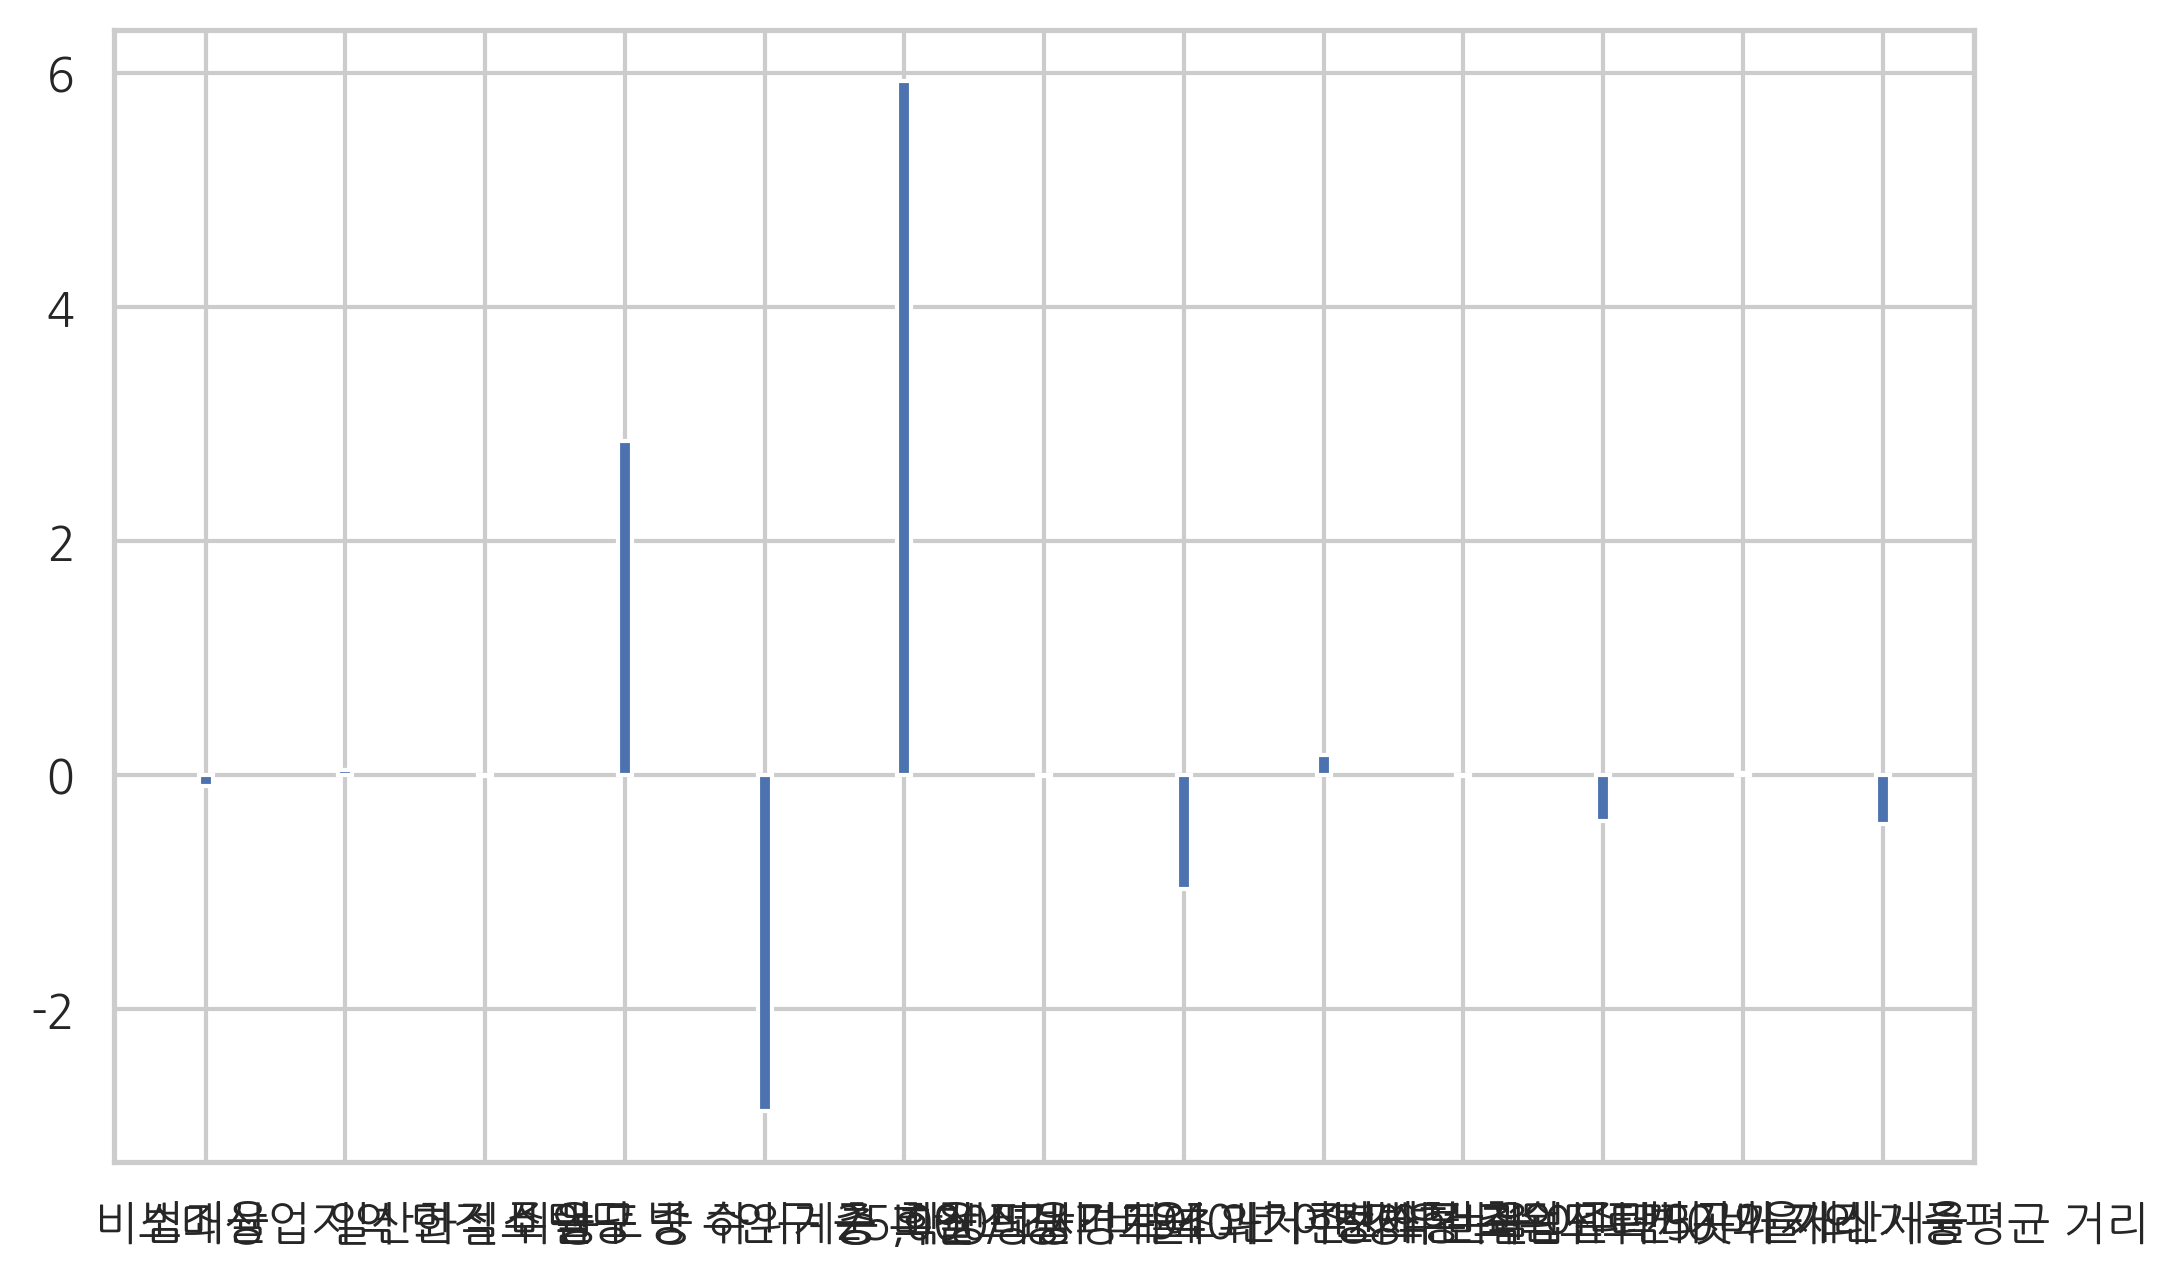

In [165]:
plt.bar(x = ['범죄율','비소매상업지역 면적 비율', '일산화질소 농도', '주택당 방 수', '인구 중 하위계층 비율', '인구 중 흑인 비율', '학생/교사 비율', '25,000평방피트 초과거주지역 비율', '찰스강 경계에 위치한 경우는 1 아니면 0', '1940년 이전에 건축된 주택의 비율', '방사형 고속도로까지의 거리', '보스톤 직업센터 5곳까지의 가중평균 거리', '재산세율'], height=boston, width=0.1)

# 결론 
- 사람들은 존나 세속적이고 속물이다. (주변에 흑인이 많이 사는가?(흑인 싫어) , 내 집 방 갯수 많은가?)
- 각 가중치는 서로 영향 주고 받는다. 각 가중치 값은 상호 의존적이다. 각 가중치 값은 상대적이다. <어떤 요소들 넣고 고려했느냐에 따라 가중치값 달라진다>